In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


XF10-24mmF4 R OIS


,filename,lens_name,focal_length,id,Unnamed: 0,MTF0.25,MTF0.5,x_coord,y_coord,meas_index,f_no
0,../../../Pictures/FUJIFILM/10-24 10mm/DSCF4237...,XF10-24mmF4 R OIS,10.0,4237,2.5,0.030360,0.006528,3209.993506,2120.019481,2.5,4.0
1,../../../Pictures/FUJIFILM/10-24 10mm/DSCF4238...,XF10-24mmF4 R OIS,10.0,4238,92.5,0.201517,0.013175,3209.993506,2120.019481,2.5,4.0
2,../../../Pictures/FUJIFILM/10-24 10mm/DSCF4239...,XF10-24mmF4 R OIS,10.0,39-2,97.5,0.196077,0.023697,3209.993506,2120.019481,2.5,4.0
3,../../../Pictures/FUJIFILM/10-24 10mm/DSCF4240...,XF10-24mmF4 R OIS,10.0,4240,22.5,0.139450,0.013055,3209.993506,2120.019481,2.5,4.0
4,../../../Pictures/FUJIFILM/10-24 10mm/DSCF4242...,XF10-24mmF4 R OIS,10.0,4242,47.5,0.060247,0.005280,3209.993506,2120.019481,2.5,5.6
...,...,...,...,...,...,...,...,...,...,...,...
71,../../../Pictures/FUJIFILM/10-24 16mm/DSCF4311...,XF10-24mmF4 R OIS,17.0,4311,10.0,0.247397,0.022996,3174.876623,1674.305195,0.0,4.0
72,../../../Pictures/FUJIFILM/10-24 16mm/DSCF4315...,XF10-24mmF4 R OIS,16.0,4315,15.0,0.328593,0.058617,3174.876623,1674.305195,0.0,11.0
73,../../../Pictures/FUJIFILM/10-24 16mm/DSCF4314...,XF10-24mmF4 R OIS,16.0,4314,20.0,0.399815,0.070009,3174.876623,1674.305195,0.0,8.0
74,../../../Pictures/FUJIFILM/10-24 16mm/DSCF4316...,XF10-24mmF4 R OIS,16.0,4316,25.0,0.270071,0.027054,3174.876623,1674.305195,0.0,16.0


<Figure size 432x288 with 0 Axes>

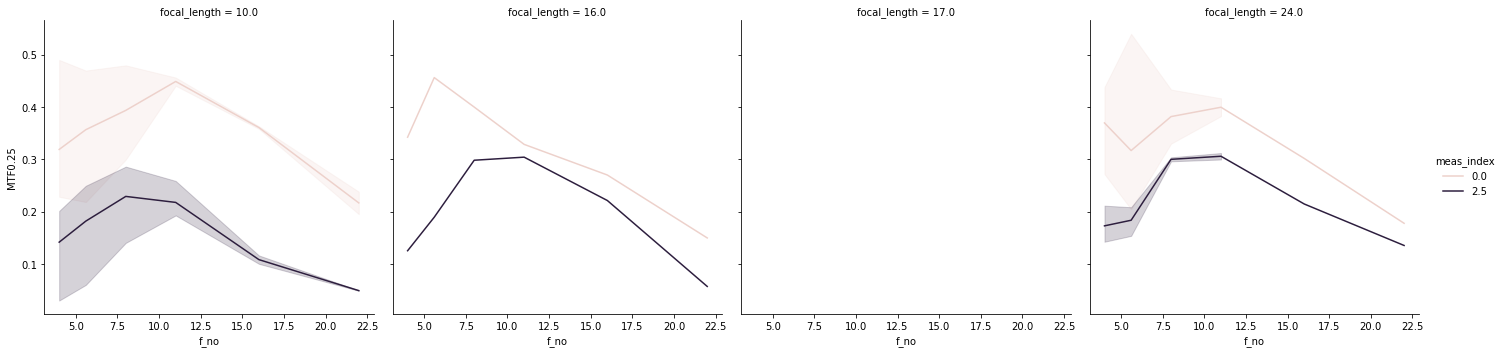

In [37]:
dfs = []
files = [r"out_ref.csv", r"out_ref_24.csv", r"out_ref_16.csv"]
for filename in files:
    dfs.append(pd.read_csv(filename))
df_MTF = pd.concat(dfs, ignore_index=True)
df_MTF["id"] = df_MTF["filename"].str[-8:-4].str.strip().astype("string")
df_MTF["focal_length"] = np.round(df_MTF["focal_length"])
df_MTF = df_MTF[~df_MTF.id.isin(["4235"])]
df_corners = df_MTF[df_MTF.meas_index.isin((1,2,3,4))].groupby(["filename", "lens_name", "focal_length", "id"]).mean().reset_index()
df_center = df_MTF[df_MTF.meas_index==0]
df_plt = pd.concat((df_corners, df_center), ignore_index=True)

for lens, df_lens in df_plt.groupby("lens_name"):

    print(lens)
    plt.figure()
    f = sns.relplot(
        data=df_lens,
        x="f_no",
        y="MTF0.25",
        kind="line",
        ci=100,
        hue="meas_index",
        col="focal_length"
    )
df_plt

In [80]:
df_tests = pd.read_csv(r"camera tests - results.csv")
df_MTF = pd.read_csv(r"out_ref.csv")
df_MTF["filename"]
df_MTF["id"] = df_MTF["filename"].str[-8:-4].str.strip().astype("string")
df_tests["filename"] = df_tests["filename"].astype("string").str.strip()

df_plt = df_MTF.merge(df_tests, how="inner", left_on="id",right_on="filename")
ids = df_plt.id.to_list()
while "4235" in ids:
    ids.remove("4235")
df_plt = df_plt[df_plt.id.isin(ids)]

In [29]:
df_center

,filename,Unnamed: 0,MTF0.25,MTF0.5,x_coord,y_coord,meas_index,f_no,focal_length
0,../../../Pictures/FUJIFILM/10-24 10mm/DSCF4237...,1.0,0.045065,0.006596,5854.564935,890.928571,1.0,4.0,10.0
1,../../../Pictures/FUJIFILM/10-24 10mm/DSCF4238...,91.0,0.237026,0.002947,5854.564935,890.928571,1.0,4.0,10.0
2,../../../Pictures/FUJIFILM/10-24 10mm/DSCF4239...,96.0,0.225793,0.017215,5854.564935,890.928571,1.0,4.0,10.0
3,../../../Pictures/FUJIFILM/10-24 10mm/DSCF4240...,21.0,0.112717,0.009012,5854.564935,890.928571,1.0,4.0,10.0
4,../../../Pictures/FUJIFILM/10-24 10mm/DSCF4242...,46.0,0.008775,0.004876,5854.564935,890.928571,1.0,5.6,10.0
5,../../../Pictures/FUJIFILM/10-24 10mm/DSCF4243...,41.0,0.281260,0.029136,5854.564935,890.928571,1.0,5.6,10.0
6,../../../Pictures/FUJIFILM/10-24 10mm/DSCF4245...,11.0,0.300976,0.046275,5854.564935,890.928571,1.0,5.6,10.0
7,../../../Pictures/FUJIFILM/10-24 10mm/DSCF4248...,81.0,0.204918,0.009416,5854.564935,890.928571,1.0,8.0,10.0
8,../../../Pictures/FUJIFILM/10-24 10mm/DSCF4249...,66.0,0.304950,0.027402,5854.564935,890.928571,1.0,8.0,10.0
9,../../../Pictures/FUJIFILM/10-24 10mm/DSCF4251...,16.0,0.294667,0.026388,5854.564935,890.928571,1.0,8.0,10.0


10-24


<Figure size 432x288 with 0 Axes>

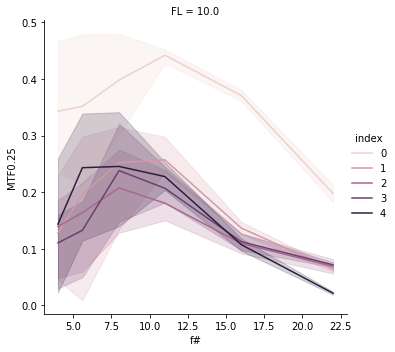

In [82]:
for lens, df_lens in df_plt.groupby("lens"):
    print(lens)
    plt.figure()
    f = sns.relplot(
        data=df_plt,
        x="f#",
        y="MTF0.25",
        kind="line",
        ci=100,
        hue="index",
        col="FL"
    )

In [83]:
df_plt_old = df_tests.melt(
    id_vars=["FL", "f#", "lens", "focus"],
    value_vars=["C", "corner average"],
    var_name="region",
    value_name="MTF"
)

10-24
16-55
50-140


<Figure size 432x288 with 0 Axes>

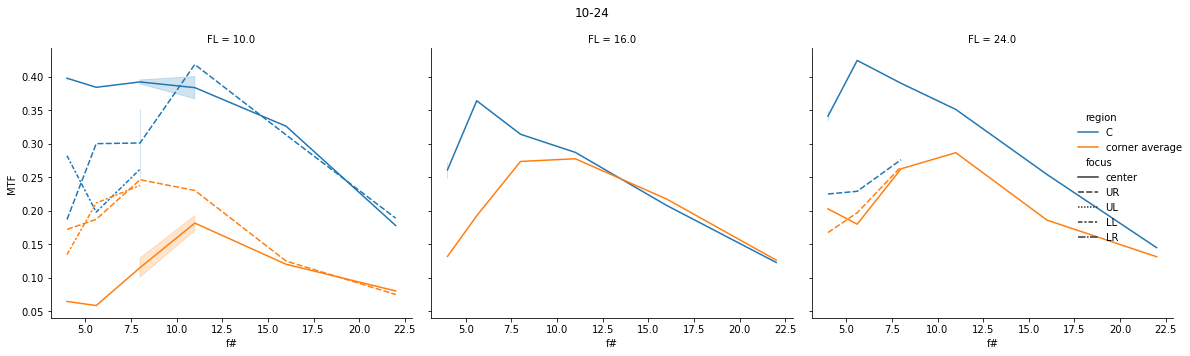

<Figure size 432x288 with 0 Axes>

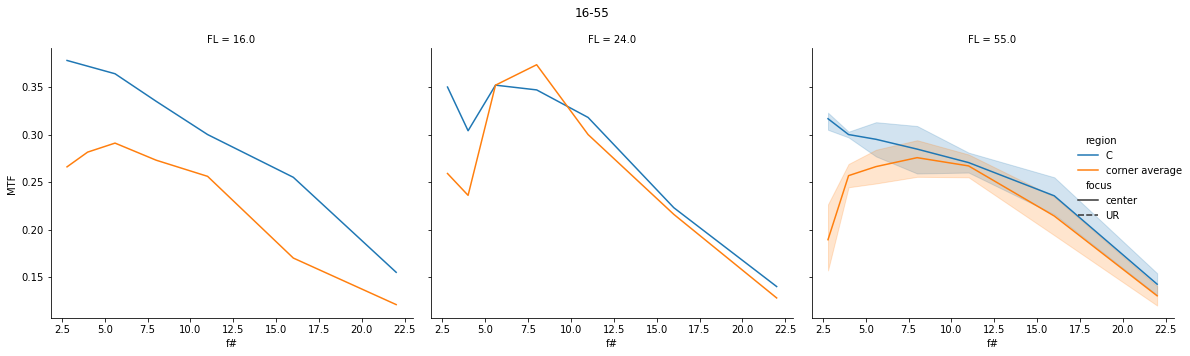

<Figure size 432x288 with 0 Axes>

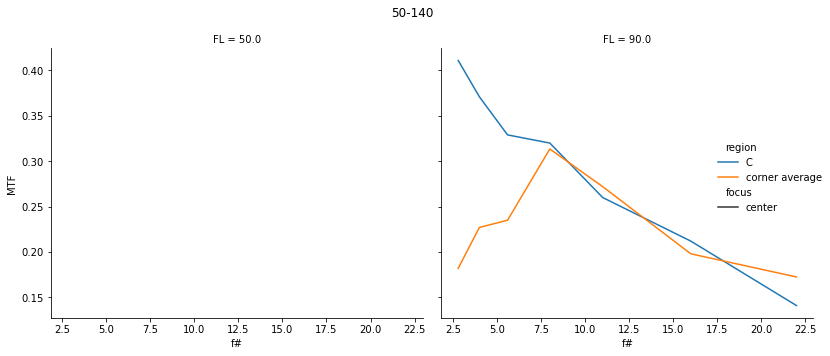

In [92]:
for lens, df_lens in df_plt_old.groupby("lens"):
    print(lens)
    plt.figure()
    f = sns.relplot(
        data=df_lens,
        x="f#",
        y="MTF",
        kind="line",
        ci=100,
        hue="region",
        col="FL",
        style="focus"
    )
    plt.suptitle(lens)
    plt.tight_layout()

In [86]:
df_plt_old

,FL,f#,lens,focus,region,MTF
0,10.0,4.0,10-24,center,C,NaN
1,10.0,4.0,10-24,center,C,0.3950
2,10.0,4.0,10-24,UR,C,NaN
3,10.0,4.0,10-24,center,C,0.4000
4,10.0,4.0,10-24,UR,C,0.1870
...,...,...,...,...,...,...
229,55.0,2.8,16-55,center,corner average,0.1845
230,NaN,NaN,NaN,NaN,corner average,NaN
231,NaN,NaN,NaN,NaN,corner average,NaN
232,NaN,NaN,NaN,NaN,corner average,NaN
